### Naïve Bayes Project: Predicción de pérdida de clientes bancarios


# 1. Datasheet (Descripción del Conjunto de Datos)

El conjunto de datos representa la información de **9996 clientes** de una compañía, con el objetivo de predecir si un cliente **abandonó (Exited = 1)** o **permaneció (Exited = 0)** en la empresa. Cada registro corresponde a un cliente único, con datos demográficos, financieros y de historial dentro de la empresa.

## Variables (Features y Target)

| Variable            | Descripción                                                                                          | Tipo         |
|---------------------|------------------------------------------------------------------------------------------------------|--------------|
| **CustomerId**       | Identificador único de cada cliente.                                                                | Numérico (ID) |
| **Surname**         | Apellido del cliente.                                                                               | Categórica   |
| **CreditScore**      | Puntuación de crédito del cliente (entre 0 y 1000).                                                   | Numérico     |
| **Geography**        | País de residencia del cliente (por ejemplo, Francia, Alemania, España).                             | Categórica   |
| **Gender**           | Género del cliente: `Male` o `Female` (posteriormente codificable como 1 = Male, 0 = Female).        | Categórica   |
| **Age**              | Edad del cliente en años.                                                                            | Numérico     |
| **Tenure**           | Antigüedad del cliente en la compañía (en años).                                                      | Numérico     |
| **Balance**          | Saldo actual en la cuenta bancaria del cliente.                                                       | Numérico     |
| **HasCrCard**        | Indica si el cliente tiene una tarjeta de crédito (1 = sí, 0 = no).                                  | Binaria      |
| **IsActiveMember**   | Indica si el cliente es un miembro activo de la compañía (1 = sí, 0 = no).                           | Binaria      |
| **EstimatedSalary**  | Salario estimado anual del cliente.                                                                  | Numérico     |
| **Exited**           | Variable objetivo (Target), indica si el cliente dejó la compañía (1 = sí, 0 = no).                   | Binaria      |

## Objetivo

El objetivo es utilizar el algoritmo de **Naïve Bayes** para predecir si un cliente **abandonará o no** la compañía (variable objetivo `Exited`), a partir de sus características personales, financieras y de historial.

## Nota sobre el preprocesamiento

- La variable **Gender** se puede convertir a numérica:  
    - Male ➡️ 1  
    - Female ➡️ 0

- La variable **Geography** se puede codificar usando **One-Hot Encoding** o **Label Encoding**, según el algoritmo.
- Variables como **CustomerId** se pueden eliminar porque no aportan valor predictivo.


In [308]:
# Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import itertools 

from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

In [309]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics 

In [310]:
data = pd.read_csv('Churn_Modelling.csv')
print(f" shape: {data.shape}")
data.head()

 shape: (9998, 12)


,Customer ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41.0,1,83807.86,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42.0,8,159660.80,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39.0,1,0.00,0,0,93826.63,0
4,15574012,Chu,645,Spain,Male,44.0,8,113755.78,1,0,149756.71,1


In [311]:
df = pd.DataFrame(data)
df

,Customer ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41.0,1,83807.86,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42.0,8,159660.80,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39.0,1,0.00,0,0,93826.63,0
4,15574012,Chu,645,Spain,Male,44.0,8,113755.78,1,0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9993,15584532,Liu,709,France,Female,36.0,7,0.00,0,1,42085.58,1
9994,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,1,0,92888.52,1
9995,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,1,0,92888.52,1
9996,15628319,Walker,792,France,Female,28.0,4,130142.79,1,0,38190.78,0


In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer ID      9998 non-null   int64  
 1   Surname          9998 non-null   object 
 2   CreditScore      9998 non-null   int64  
 3   Geography        9998 non-null   object 
 4   Gender           9998 non-null   object 
 5   Age              9998 non-null   float64
 6   Tenure           9998 non-null   int64  
 7   Balance          9998 non-null   float64
 8   HasCrCard        9998 non-null   int64  
 9   IsActiveMember   9998 non-null   int64  
 10  EstimatedSalary  9998 non-null   float64
 11  Exited           9998 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 937.4+ KB


### 3. Preparación del Dataseet

In [313]:
df.isnull().sum().to_frame('NaN value')

,NaN value
Customer ID,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
HasCrCard,0
IsActiveMember,0


In [314]:
for col in df:
    print(f" {col}: {df[col].nunique()}")

 Customer ID: 9996
 Surname: 2932
 CreditScore: 460
 Geography: 3
 Gender: 2
 Age: 73
 Tenure: 11
 Balance: 6379
 HasCrCard: 2
 IsActiveMember: 2
 EstimatedSalary: 9995
 Exited: 2


In [315]:
df.describe(include = [np.number]).T

,count,mean,std,min,25%,50%,75%,max
Customer ID,9998.0,1.569094e+07,71923.987928,15565701.00,15628537.00,15690732.00,1.575323e+07,15815690.00
CreditScore,9998.0,6.505296e+02,96.633003,350.00,584.00,652.00,7.180000e+02,850.00
Age,9998.0,3.892029e+01,10.487986,18.00,32.00,37.00,4.400000e+01,92.00
Tenure,9998.0,5.013003e+00,2.892152,0.00,3.00,5.00,7.000000e+00,10.00
Balance,9998.0,7.648149e+04,62393.187035,0.00,0.00,97173.29,1.276414e+05,250898.09
HasCrCard,9998.0,7.055411e-01,0.455822,0.00,0.00,1.00,1.000000e+00,1.00
IsActiveMember,9998.0,5.148030e-01,0.499806,0.00,0.00,1.00,1.000000e+00,1.00
EstimatedSalary,9998.0,1.000998e+05,57510.939962,11.58,50983.75,100218.21,1.493959e+05,199992.48
Exited,9998.0,2.038408e-01,0.402872,0.00,0.00,0.00,0.000000e+00,1.00


In [316]:
df.describe(include = [object]).T

,count,unique,top,freq
Surname,9998,2932,Smith,32
Geography,9998,3,France,5012
Gender,9998,2,Male,5455


In [317]:
df.describe(include=[float]).T

,count,mean,std,min,25%,50%,75%,max
Age,9998.0,38.920287,10.487986,18.00,32.00,37.00,44.0000,92.00
Balance,9998.0,76481.490819,62393.187035,0.00,0.00,97173.29,127641.4175,250898.09
EstimatedSalary,9998.0,100099.786455,57510.939962,11.58,50983.75,100218.21,149395.8825,199992.48


## Análisis de Estadísticas Descriptivas  

### Edad (Age)  
- Entre 18 y 92 años, mediana de 37  
- Clientes jóvenes y adultos mayores  

### Puntaje de crédito (CreditScore)  
- Entre 350 y 850, media de 650  
- La mayoría tiene puntajes dentro del rango medio-alto  

### Balance  
- Entre 0 y 250,898, mediana de 97,173  
- Hay clientes sin saldo y otros con balances altos  

### Salario Estimado (EstimatedSalary)  
- Entre 11 y 199,992, mediana de 100,218  
- Gran variación en ingresos, pero tendencia a la media  

### Miembros Activos (IsActiveMember)  
- Distribución casi equitativa (0.51 de media)  
- Clientes activos e inactivos en proporciones similares  

### Clientes que abandonan (Exited - Variable Objetivo)  
- Solo el 20% de los clientes abandonan la compañía  

### Género  
- Distribución casi igual entre hombres y mujeres  
- Diferencia de solo 118 clientes  

### Geografía  
- Predomina Francia como país con más clientes  

## Conclusión General  
- Variables con rangos muy distintos → Se requiere estandarización o normalización
- CustomerID, Surname y Geography no aportan valor → Pueden eliminarse  

### Elimiar celdaas sin valor "Preparación del Dataseet"

In [318]:
df.drop('Customer ID', axis=1, inplace=True)

In [319]:
df.drop('Surname', axis=1, inplace=True)

In [320]:
df.drop('Geography', axis=1, inplace=True)
df

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42.0,2,0.00,1,1,101348.88,1
1,608,Female,41.0,1,83807.86,0,1,112542.58,0
2,502,Female,42.0,8,159660.80,1,0,113931.57,1
3,699,Female,39.0,1,0.00,0,0,93826.63,0
4,645,Male,44.0,8,113755.78,1,0,149756.71,1
...,...,...,...,...,...,...,...,...,...
9993,709,Female,36.0,7,0.00,0,1,42085.58,1
9994,772,Male,42.0,3,75075.31,1,0,92888.52,1
9995,772,Male,42.0,3,75075.31,1,0,92888.52,1
9996,792,Female,28.0,4,130142.79,1,0,38190.78,0


In [321]:
df['Gender'] = df['Gender'].replace(['Male','Female'], [0,1])
df

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,42.0,2,0.00,1,1,101348.88,1
1,608,1,41.0,1,83807.86,0,1,112542.58,0
2,502,1,42.0,8,159660.80,1,0,113931.57,1
3,699,1,39.0,1,0.00,0,0,93826.63,0
4,645,0,44.0,8,113755.78,1,0,149756.71,1
...,...,...,...,...,...,...,...,...,...
9993,709,1,36.0,7,0.00,0,1,42085.58,1
9994,772,0,42.0,3,75075.31,1,0,92888.52,1
9995,772,0,42.0,3,75075.31,1,0,92888.52,1
9996,792,1,28.0,4,130142.79,1,0,38190.78,0


In [322]:
df.Age=df.Age.fillna(0)
df.Age=df.Age.astype(int)
df

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,42,2,0.00,1,1,101348.88,1
1,608,1,41,1,83807.86,0,1,112542.58,0
2,502,1,42,8,159660.80,1,0,113931.57,1
3,699,1,39,1,0.00,0,0,93826.63,0
4,645,0,44,8,113755.78,1,0,149756.71,1
...,...,...,...,...,...,...,...,...,...
9993,709,1,36,7,0.00,0,1,42085.58,1
9994,772,0,42,3,75075.31,1,0,92888.52,1
9995,772,0,42,3,75075.31,1,0,92888.52,1
9996,792,1,28,4,130142.79,1,0,38190.78,0


In [323]:
# Función de normalización 
def normalize_column(df, column, new_min=0, new_max=1000):
    old_min = df[column].min()
    old_max = df[column].max()
    df[column] = new_min + ((df[column] - old_min) / (old_max - old_min)) * (new_max - new_min)
    return df

# Aplicar la normalización a Balance y EstimatedSalary
df = normalize_column(df, 'Balance', 0, 1000)
df = normalize_column(df, 'EstimatedSalary', 0, 1000)
df

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,42,2,0.000000,1,1,506.734893,1
1,608,1,41,1,334.031479,0,1,562.708739,0
2,502,1,42,8,636.357176,1,0,569.654352,1
3,699,1,39,1,0.000000,0,0,469.120051,0
4,645,0,44,8,453.394364,1,0,748.797160,1
...,...,...,...,...,...,...,...,...,...
9993,709,1,36,7,0.000000,0,1,210.390092,1
9994,772,0,42,3,299.226311,1,0,464.429053,1
9995,772,0,42,3,299.226311,1,0,464.429053,1
9996,792,1,28,4,518.707775,1,0,190.914232,0


In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9998 non-null   int64  
 1   Gender           9998 non-null   int64  
 2   Age              9998 non-null   int32  
 3   Tenure           9998 non-null   int64  
 4   Balance          9998 non-null   float64
 5   HasCrCard        9998 non-null   int64  
 6   IsActiveMember   9998 non-null   int64  
 7   EstimatedSalary  9998 non-null   float64
 8   Exited           9998 non-null   int64  
dtypes: float64(2), int32(1), int64(6)
memory usage: 664.1 KB


In [325]:
df.describe(include = [np.number]).T

,count,mean,std,min,25%,50%,75%,max
CreditScore,9998.0,650.529606,96.633003,350.0,584.000000,652.000000,718.00000,850.0
Gender,9998.0,0.454391,0.497940,0.0,0.000000,0.000000,1.00000,1.0
Age,9998.0,38.920184,10.488004,18.0,32.000000,37.000000,44.00000,92.0
Tenure,9998.0,5.013003,2.892152,0.0,3.000000,5.000000,7.00000,10.0
Balance,9998.0,304.830901,248.679402,0.0,0.000000,387.301832,508.73810,1000.0
HasCrCard,9998.0,0.705541,0.455822,0.0,0.000000,1.000000,1.00000,1.0
IsActiveMember,9998.0,0.514803,0.499806,0.0,0.000000,1.000000,1.00000,1.0
EstimatedSalary,9998.0,500.488829,287.582164,0.0,254.885192,501.081003,746.99285,1000.0
Exited,9998.0,0.203841,0.402872,0.0,0.000000,0.000000,0.00000,1.0


### 4. Análisis Exploratorio de Datos (EDA)

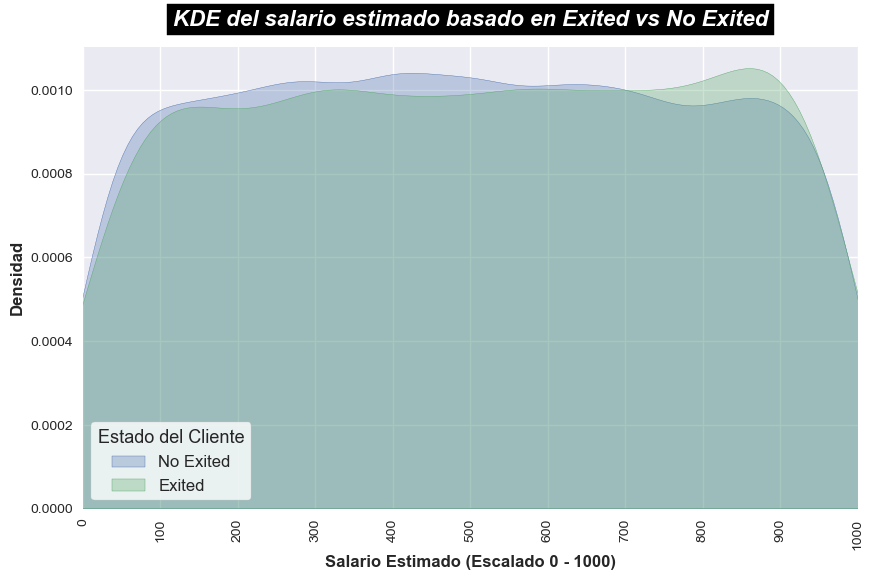

In [326]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Estilo de gráficos
plt.style.use('seaborn-v0_8')

# Configuración del título
font = {'fontsize': 16, 'fontstyle': 'italic', 'color': 'white', 'weight': 'bold'}
%matplotlib inline

# Crear la figura
plt.figure(figsize=(10, 6))

# Gráfico KDE con mejoras visuales
sns.kdeplot(df.loc[df['Exited'] == 0, 'EstimatedSalary'], label='No Exited', fill=True, alpha=0.3)
sns.kdeplot(df.loc[df['Exited'] == 1, 'EstimatedSalary'], label='Exited', fill=True, alpha=0.3)

# Configuración del título y ejes
plt.title('KDE del salario estimado basado en Exited vs No Exited', fontdict=font, pad=15, backgroundcolor='black')
plt.xlabel('Salario Estimado (Escalado 0 - 1000)', fontsize=12, fontweight='bold')
plt.ylabel('Densidad', fontsize=12, fontweight='bold')

# Ajuste de ejes
plt.xticks(np.arange(0, 1001, 100), rotation=90)
plt.xlim([0, 1000])

# Leyenda con fondo
plt.legend(title='Estado del Cliente', fontsize=12, title_fontsize=13, frameon=True, facecolor='white')

# Mostrar la gráfica
plt.show()


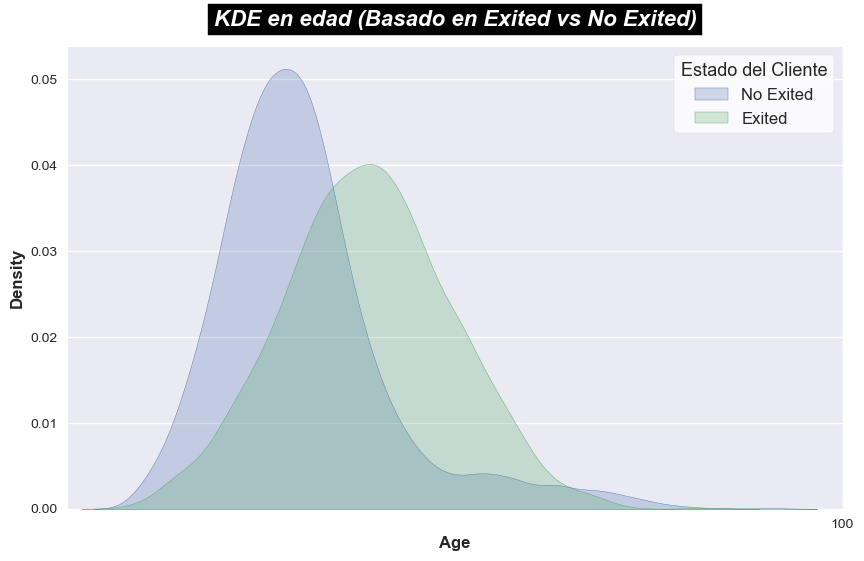

In [327]:
%matplotlib inline

# Crear la figura
plt.figure(figsize=(10, 6))

# Gráfico KDE con mejoras visuales
sns.kdeplot(df.loc[df['Exited'] == 0, 'Age'], label='No Exited', fill=True)
sns.kdeplot(df.loc[df['Exited'] == 1, 'Age'], label='Exited', fill=True)

# Configuración del título y ejes
plt.title('KDE en edad (Basado en Exited vs No Exited)', fontdict=font, pad=15, backgroundcolor='black')
plt.xlabel('Age', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')

# Ajuste de ejes
plt.xticks(np.arange(0, 1001, 100))
plt.xlim([10, 100])

# Leyenda con fondo
plt.legend(title='Estado del Cliente', fontsize=12, title_fontsize=13, frameon=True, facecolor='white')

# Mostrar la gráfica
plt.show()

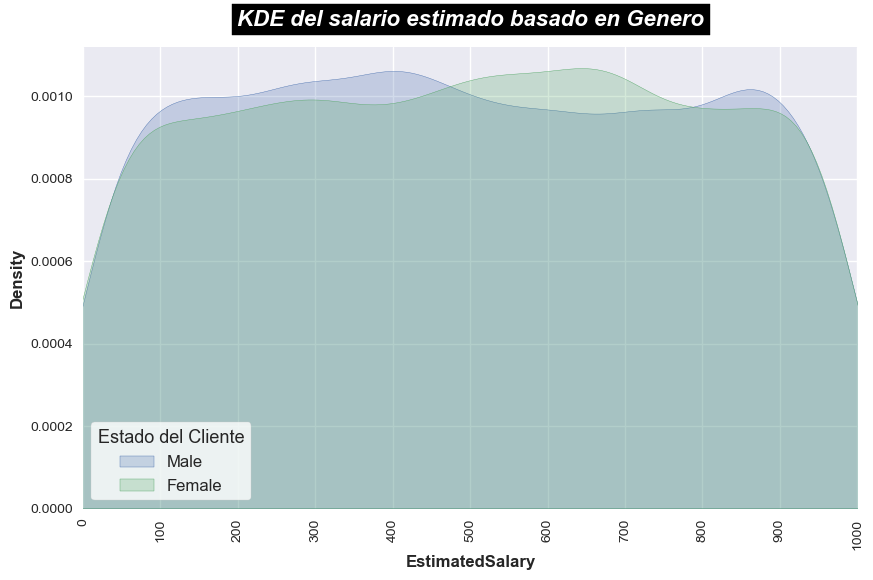

In [328]:
%matplotlib inline

# Crear la figura
plt.figure(figsize=(10, 6))

# Gráfico KDE con mejoras visuales
sns.kdeplot(df.loc[df['Gender'] == 0, 'EstimatedSalary'], label='Male', fill=True)
sns.kdeplot(df.loc[df['Gender'] == 1, 'EstimatedSalary'], label='Female', fill=True)

# Configuración del título y ejes
plt.title('KDE del salario estimado basado en Genero', fontdict=font, pad=15, backgroundcolor='black')
plt.xlabel('EstimatedSalary', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')

# Ajuste de ejes
plt.xticks(np.arange(0, 1001, 100), rotation = 90)
plt.xlim([0, 1001])

# Leyenda con fondo
plt.legend(title='Estado del Cliente', fontsize=12, title_fontsize=13, frameon=True, facecolor='white')

# Mostrar la gráfica
plt.show()

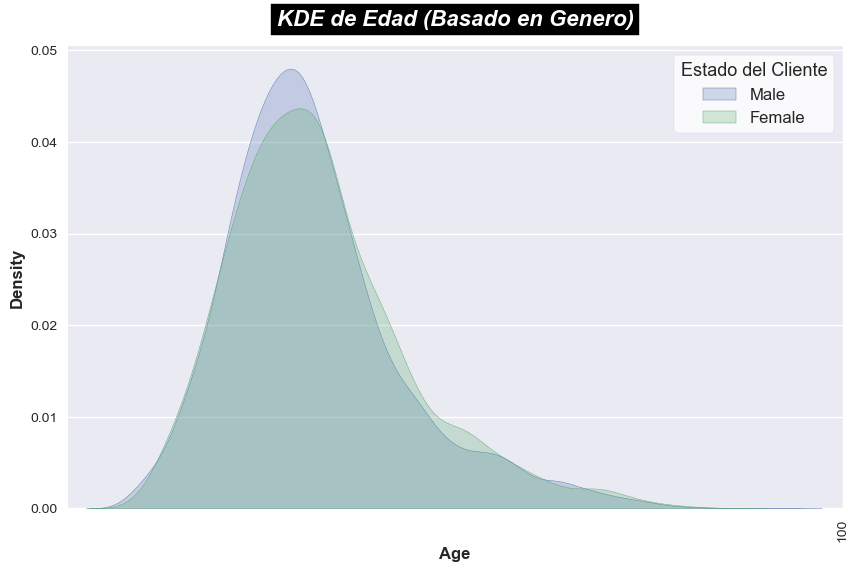

In [329]:
%matplotlib inline

# Crear la figura
plt.figure(figsize=(10, 6))

# Gráfico KDE con mejoras visuales
sns.kdeplot(df.loc[df['Gender'] == 0, 'Age'], label='Male', fill=True)
sns.kdeplot(df.loc[df['Gender'] == 1, 'Age'], label='Female', fill=True)

# Configuración del título y ejes
plt.title('KDE de Edad (Basado en Genero)', fontdict=font, pad=15, backgroundcolor='black')
plt.xlabel('Age', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')

# Ajuste de ejes
plt.xticks(np.arange(0, 1001, 100), rotation = 90)
plt.xlim([10, 100])

# Leyenda con fondo
plt.legend(title='Estado del Cliente', fontsize=12, title_fontsize=13, frameon=True, facecolor='white')

# Mostrar la gráfica
plt.show()

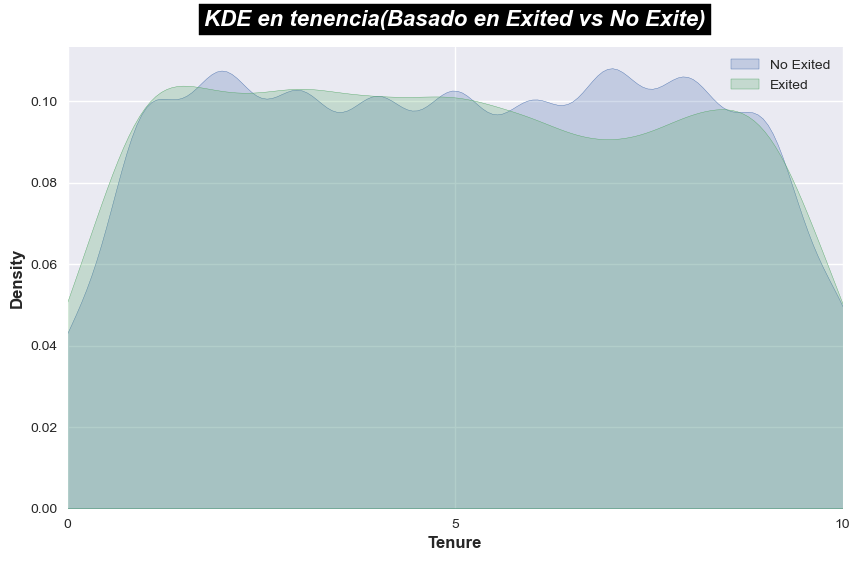

In [330]:
%matplotlib inline

# Crear la figura
plt.figure(figsize=(10, 6))

plt.style.use('seaborn-v0_8')
sns.kdeplot(df.loc[df['Exited'] == 0, 'Tenure'], label='No Exited', fill= True)
sns.kdeplot(df.loc[df['Exited'] == 1, 'Tenure'], label='Exited', fill= True)

# Configuración del título y ejes
plt.title('KDE en tenencia(Basado en Exited vs No Exite)', fontdict=font, pad=15, backgroundcolor='black')
plt.xlabel('Tenure', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')

plt.xticks(np.arange(0,70,5))
plt.xlim([0,10])
plt.legend()
plt.show()

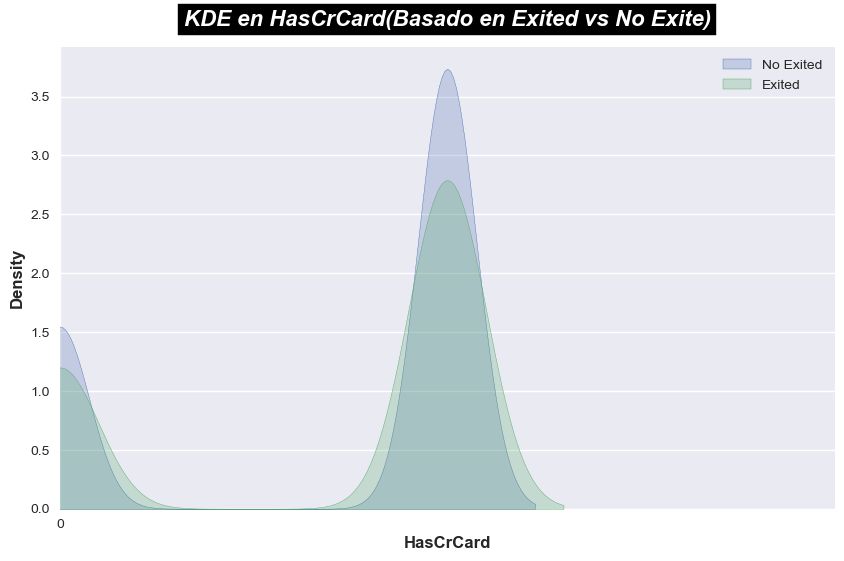

In [331]:
%matplotlib inline

# Crear la figura
plt.figure(figsize=(10, 6))

plt.style.use('seaborn-v0_8')
sns.kdeplot(df.loc[df['Exited'] == 0, 'HasCrCard'], label='No Exited', fill= True)
sns.kdeplot(df.loc[df['Exited'] == 1, 'HasCrCard'], label='Exited', fill= True)

# Configuración del título y ejes
plt.title('KDE en HasCrCard(Basado en Exited vs No Exite)', fontdict=font, pad=15, backgroundcolor='black')
plt.xlabel('HasCrCard', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')

plt.xticks(np.arange(0,70,5))
plt.xlim([0,2])
plt.legend()
plt.show()

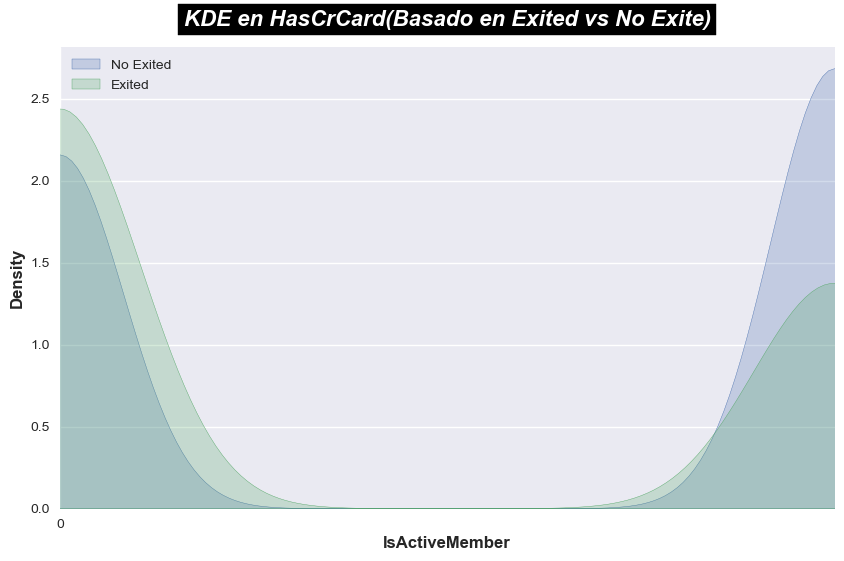

In [332]:
%matplotlib inline

# Crear la figura
plt.figure(figsize=(10, 6))

plt.style.use('seaborn-v0_8')
sns.kdeplot(df.loc[df['Exited'] == 0, 'IsActiveMember'], label='No Exited', fill= True)
sns.kdeplot(df.loc[df['Exited'] == 1, 'IsActiveMember'], label='Exited', fill= True)

# Configuración del título y ejes
plt.title('KDE en HasCrCard(Basado en Exited vs No Exite)', fontdict=font, pad=15, backgroundcolor='black')
plt.xlabel('IsActiveMember', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')

plt.xticks(np.arange(0,70,5))
plt.xlim([0,1])
plt.legend()
plt.show()


# Análisis de Distribución KDE

## 1. KDE del Salario Estimado basado en Exited vs No Exited  
- No hay una diferencia significativa en la distribución del salario entre clientes que han salido y los que no.  
- El salario estimado no parece ser un factor clave en la retención o abandono de clientes.

## 2. KDE de Edad basado en Exited vs No Exited  
- Los clientes que han salido tienden a ser de mayor edad en comparación con los que se quedan.  
- La edad podría influir en la tasa de abandono, con clientes mayores siendo más propensos a salir.

## 3. KDE del Salario Estimado basado en Género  
- La distribución del salario entre hombres y mujeres es similar.  
- Esto sugiere que el género no influye significativamente en los ingresos de los clientes.

## 4. KDE de Edad basado en Género  
- Se observa una diferencia en la distribución de la edad según el género.  
- Esto podría indicar una variación en la edad promedio de los clientes por género.

## 5. KDE en Tenencia basado en Exited vs No Exited  
- La distribución de la tenencia de cuenta es similar entre clientes que se quedan y los que salen.  
- La tenencia no parece ser un factor determinante para la salida del cliente.

## 6. KDE en HasCrCard basado en Exited vs No Exited  
- Se observa una diferencia en la posesión de tarjeta de crédito entre clientes que salen y los que se quedan.  
- Sin embargo, la diferencia puede no ser muy marcada.

## 7. KDE en IsActiveMember basado en Exited vs No Exited  
- Los clientes activos tienen menos probabilidades de salir.  
- Aquellos que no son miembros activos tienen una mayor tasa de abandono.  
- La actividad dentro del banco es un fuerte predictor de la retención de clientes.

### 4.1 Análisis univariable

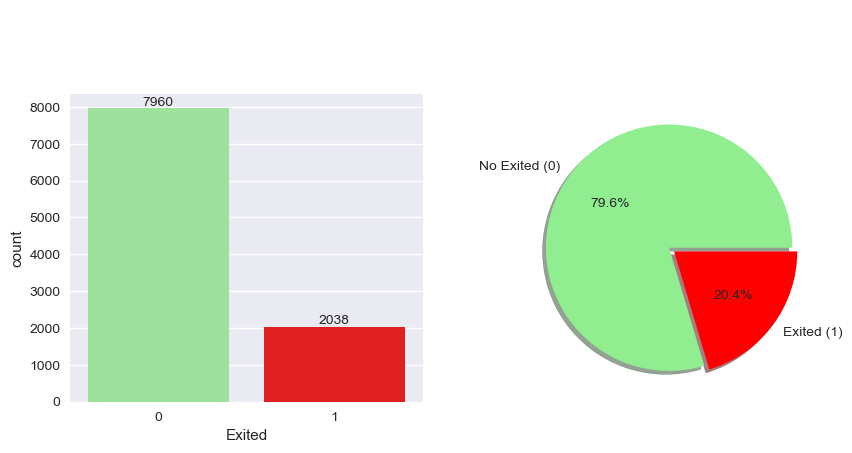

In [333]:
# recuento basado en quienes salieron (gráfico de conteo)
%matplotlib inline
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.countplot(data=df, x='Exited', ax=axes[0], palette=['lightgreen', 'red'])  # Lightreen for No Exited, Red for Exited
for container in axes[0].containers:
    axes[0].bar_label(container)

slices = df.Exited.value_counts().values
activities = ['No Exited (0)', 'Exited (1)']
axes[1].pie(slices, labels=activities, colors=['lightgreen', 'red'], shadow=True, explode=[0, 0.05], autopct='%1.1f%%')

plt.suptitle('Conteo de quienes salieron', y=1.09, **font)
plt.show()

### 4.2 Análisis Bivariable

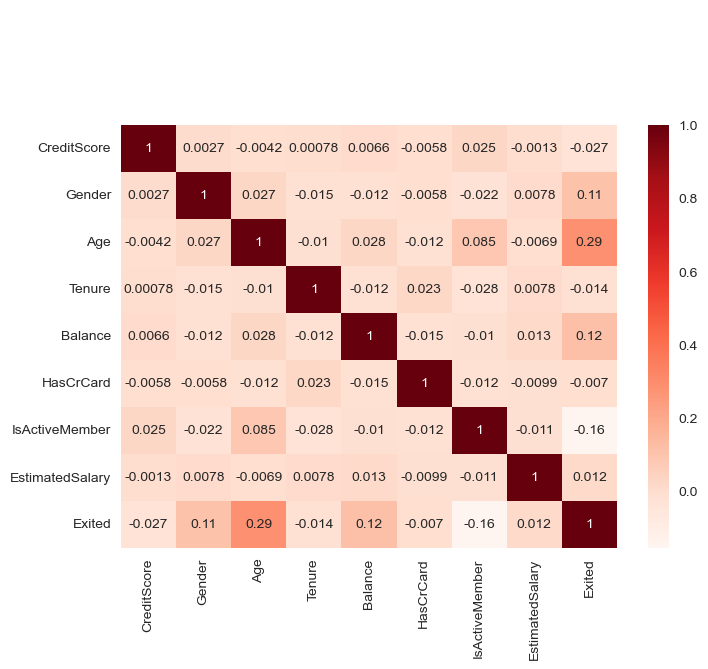

In [334]:
sns.heatmap(df.corr(), cmap='Reds', annot = True)
plt.suptitle('Conteo de quienes salieron', y = 1.09, x= 0.35, **font)
plt.show()

# Análisis de la Matriz de Correlación
- La **edad** y la **actividad del cliente** son los factores más relevantes en la retención o salida de clientes.
- El **saldo y el género** tienen una influencia menor, pero aún así pueden ser considerados en estrategias de retención.
- Factores como **tenencia, tarjeta de crédito y salario** no parecen tener un impacto significativo en la decisión de abandonar el banco.

### 4.3 Análisis Multivariable

In [335]:
# Crear un gráfico 3D de dispersión
fig = px.scatter_3d(
    data_frame=df,  # DataFrame que contiene los datos a graficar
    x='Age',  # Eje X: Edad
    y='EstimatedSalary',  # Eje Y: Salario estimado
    z='Gender',  # Eje Z: Balance (agregado como tercera dimensión)
    color='Exited',  # Colorear los puntos según si 'Exited' (si salió o no)
    size='CreditScore',  # Tamaño de los puntos basado en 'CreditScore'
    hover_data=['Gender', 'Tenure', 'Exited'],  # Datos adicionales que se muestran al pasar el cursor
    template='ggplot2',  # Plantilla para el diseño del gráfico
    opacity=0.6,  # Opacidad de los puntos (transparencia)
    height=700,  # Altura del gráfico
    title=f'Gráfico 3D de Dispersión basado en Edad, Salario Estimado, genero'  # Título del gráfico
)

# Mostrar el gráfico
pio.show(fig)

In [336]:
results= pd.pivot_table(data=df,index='Exited', columns='Gender',values= 'EstimatedSalary')
results.style.background_gradient(cmap='cividis_r')

Gender,0,1
Exited,,
0,498.547851,499.010046
1,497.873843,514.736188


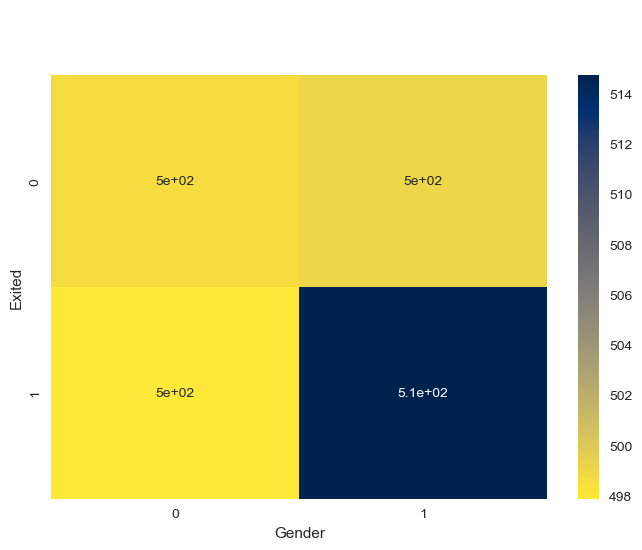

In [337]:
sns.heatmap(results, cmap='cividis_r', annot= True)
plt.suptitle('Salario estimado por genero y salidas', y=1,x=0.45,**font)
plt.show()

In [338]:
results= pd.pivot_table(data=df,index='Exited', columns='Gender',values= 'Age')
results.style.background_gradient(cmap='cividis_r')

Gender,0,1
Exited,,
0,37.425812,37.378085
1,44.902113,44.784899


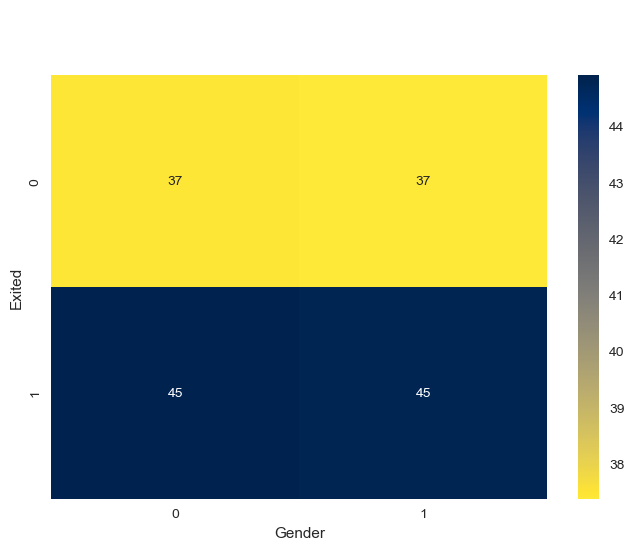

In [339]:
sns.heatmap(results, cmap='cividis_r', annot= True)
plt.suptitle('Edad por genero y salidas', y=1,x=0.45,**font)
plt.show()

In [340]:
results= pd.pivot_table(data=df,index='Exited', columns='Gender',values= 'CreditScore')
results.style.background_gradient(cmap='cividis_r')

Gender,0,1
Exited,,
0,651.618306,652.135429
1,643.551724,646.883231


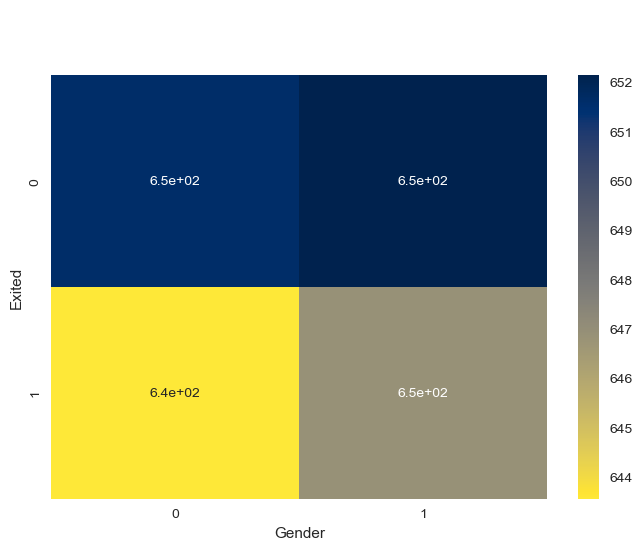

In [341]:
sns.heatmap(results, cmap='cividis_r', annot= True)
plt.suptitle('CreditScore por genero y salidas', y=1,x=0.45,**font)
plt.show()

# Análisis de Matrices de Calor

## Salario estimado por género y salidas  
- Los clientes que **no han salido** (`Exited = 0`) tienen salarios similares en ambos géneros.  
- Los que **han salido** (`Exited = 1`) presentan salarios ligeramente menores, pero sin grandes diferencias.  
- **El salario no influye significativamente en la salida de clientes.**  

## Edad por género y salidas  
- Los clientes que **permanecen** (`Exited = 0`) tienen una edad promedio de **~37 años**.  
- Los que **han salido** (`Exited = 1`) tienen una edad promedio de **~45 años**.  
- **Los clientes mayores de 45 años tienden a abandonar el banco con mayor frecuencia.**  

## Puntuación de crédito por género y salidas  
- Los clientes que **no han salido** tienen puntuaciones de crédito similares en ambos géneros.  
- Entre los que **han salido**, los hombres tienen una puntuación de crédito **ligeramente menor** que las mujeres.  
- **Esto sugiere que la combinación de una puntuación de crédito baja y la edad puede influir en la salida de clientes, especialmente en hombres.**  

## Conclusión General  
- **La edad es un factor más determinante que el salario en la salida de clientes.**  
- **Los clientes mayores de 45 años tienen mayor probabilidad de irse.**  
- **El género no es un factor clave, pero los hombres con puntuaciones de crédito más bajas parecen tener mayor riesgo de salida.**  


### 5. Modelo de Preedicción

In [342]:
df

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,42,2,0.000000,1,1,506.734893,1
1,608,1,41,1,334.031479,0,1,562.708739,0
2,502,1,42,8,636.357176,1,0,569.654352,1
3,699,1,39,1,0.000000,0,0,469.120051,0
4,645,0,44,8,453.394364,1,0,748.797160,1
...,...,...,...,...,...,...,...,...,...
9993,709,1,36,7,0.000000,0,1,210.390092,1
9994,772,0,42,3,299.226311,1,0,464.429053,1
9995,772,0,42,3,299.226311,1,0,464.429053,1
9996,792,1,28,4,518.707775,1,0,190.914232,0


Como puedes ver, tanto los datos de tipo discreto como continuo están presentes en el conjunto de datos, por lo que, entre los tipos de Naive Bayes, usamos el Naive Bayes Multinomial.
Teniendo en cuenta que el rango de las características es muy diferente, como se mencionó anteriormente, estas deben ser estandarizadas primero.

In [343]:
# Estandarizar el salario estimado y la edad con StandardScaler
df2 = df.copy()
scaler = MinMaxScaler(feature_range=(18,82)).fit(df[['EstimatedSalary']])
df2['EstimatedSalary'] = scaler.transform(df2['EstimatedSalary'].values.reshape(-1,1))
df2

C:\Users\bryam\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,42,2,0.000000,1,1,50.431033,1
1,608,1,41,1,334.031479,0,1,54.013359,0
2,502,1,42,8,636.357176,1,0,54.457879,1
3,699,1,39,1,0.000000,0,0,48.023683,0
4,645,0,44,8,453.394364,1,0,65.923018,1
...,...,...,...,...,...,...,...,...,...
9993,709,1,36,7,0.000000,0,1,31.464966,1
9994,772,0,42,3,299.226311,1,0,47.723459,1
9995,772,0,42,3,299.226311,1,0,47.723459,1
9996,792,1,28,4,518.707775,1,0,30.218511,0


In [344]:
# Estandarizar el Balance y la edad con StandardScaler
df2 = df.copy()
scaler = MinMaxScaler(feature_range=(18,82)).fit(df[['Balance']])
df2['Balance'] = scaler.transform(df2['Balance'].values.reshape(-1,1))
df2

C:\Users\bryam\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,42,2,18.000000,1,1,506.734893,1
1,608,1,41,1,39.378015,0,1,562.708739,0
2,502,1,42,8,58.726859,1,0,569.654352,1
3,699,1,39,1,18.000000,0,0,469.120051,0
4,645,0,44,8,47.017239,1,0,748.797160,1
...,...,...,...,...,...,...,...,...,...
9993,709,1,36,7,18.000000,0,1,210.390092,1
9994,772,0,42,3,37.150484,1,0,464.429053,1
9995,772,0,42,3,37.150484,1,0,464.429053,1
9996,792,1,28,4,51.197298,1,0,190.914232,0


In [345]:
# Estandarizar el Balance y la edad con StandardScaler
df2 = df.copy()
scaler = MinMaxScaler(feature_range=(18,82)).fit(df[['CreditScore']])
df2['CreditScore'] = scaler.transform(df2['CreditScore'].values.reshape(-1,1))
df2

C:\Users\bryam\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,52.432,1,42,2,0.000000,1,1,506.734893,1
1,51.024,1,41,1,334.031479,0,1,562.708739,0
2,37.456,1,42,8,636.357176,1,0,569.654352,1
3,62.672,1,39,1,0.000000,0,0,469.120051,0
4,55.760,0,44,8,453.394364,1,0,748.797160,1
...,...,...,...,...,...,...,...,...,...
9993,63.952,1,36,7,0.000000,0,1,210.390092,1
9994,72.016,0,42,3,299.226311,1,0,464.429053,1
9995,72.016,0,42,3,299.226311,1,0,464.429053,1
9996,74.576,1,28,4,518.707775,1,0,190.914232,0


In [346]:
# define x (características) e y (objetivo)
x = np.asanyarray(df2.drop('Exited', axis=1))
y = df2.Exited.values.reshape(-1,1)

In [347]:
ACC_test = []
ACC_train = []
Recall = []
Precision = []
F1 = []

def plot_confusion_matrix2(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
        cm(array): confusion matrix
        classes(dictionary): classes in our target
    """
    plt.figure(figsize=(10,7))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt ='d'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

# --------------------------------------------------------------------------------------

def modeling(x, y, test_size, classes, is_add=1):

    # split data to train and test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
    print(20*'-', 'Shape', 20*'-')
    print(f"x_train: {x_train.shape}")
    print(f"y_train: {y_train.shape}")
    print(f"x_test: {x_test.shape}")
    print(f"y_test: {y_test.shape}")

    # define model and fit model
    clf = MultinomialNB()
    clf.fit(x_train, y_train.ravel())

    # prediction and results
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)

    cm = metrics.confusion_matrix(y_test, y_pred_test)
    acc_test = metrics.accuracy_score(y_test, y_pred_test)
    acc_train = metrics.accuracy_score(y_train, y_pred_train)
    rec = metrics.recall_score(y_test, y_pred_test)
    pre = metrics.precision_score(y_test, y_pred_test)
    f1 = metrics.f1_score(y_test, y_pred_test)

    # append results
    if is_add == 1:
        ACC_test.append(acc_test)
        ACC_train.append(acc_train)
        Recall.append(rec)
        Precision.append(pre)
        F1.append(f1)

    # Evaluation model
    print('-'*20 , 'Confusion Matrix', '-'*20)
    print(cm)
    plot_confusion_matrix2(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues)

    print('-'*20 , 'Classification Report', '-'*20)
    print(metrics.classification_report(y_test, y_pred_test, target_names=classes), '\n')
    print(f"Jaccard Score: {metrics.jaccard_score(y_test, y_pred_test)}", '\n')

    return clf, acc_test, acc_train


-------------------- Shape --------------------
x_train: (7998, 8)
y_train: (7998, 1)
x_test: (2000, 8)
y_test: (2000, 1)
-------------------- Confusion Matrix --------------------
[[902 680]
 [189 229]]


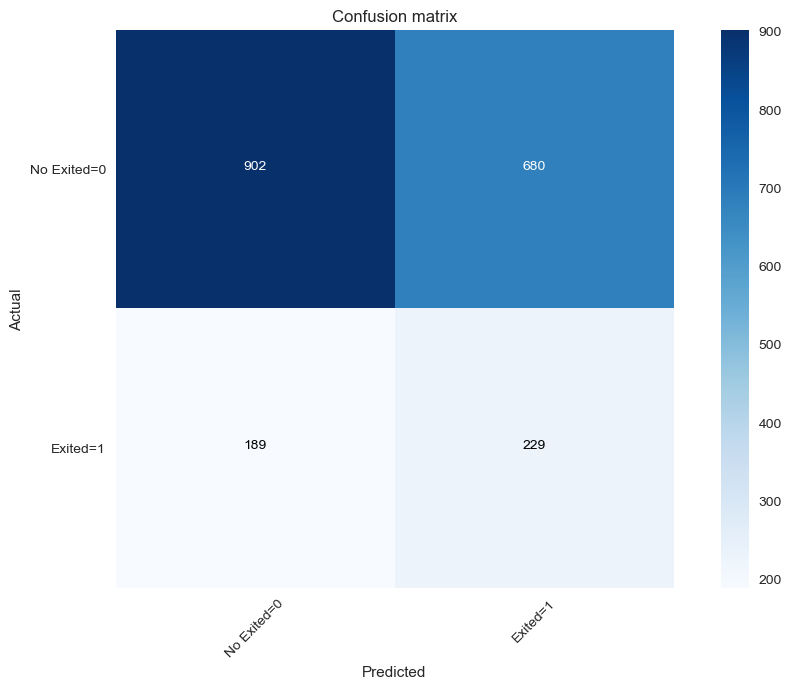

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

 No Exited=0       0.83      0.57      0.67      1582
    Exited=1       0.25      0.55      0.35       418

    accuracy                           0.57      2000
   macro avg       0.54      0.56      0.51      2000
weighted avg       0.71      0.57      0.61      2000
 

Jaccard Score: 0.20856102003642987 



In [348]:
# Ahora crea el primer modelo
clf1, acc_test1, acc_train1 = modeling(x, y, 0.2, ['No Exited=0', 'Exited=1'])

### Conclusiones Confusion Matrix y Classification Report

1. **Precisión global:** 57% (desempeño moderado).  
2. **Clase "No Exited (0)"**  
   - Precisión: 83%  
   - Recall: 57% (muchos falsos positivos).  
3. **Clase "Exited (1)"**  
   - Precisión: 25%  
   - Recall: 55% (muchos falsos negativos).  
4. **Problemas detectados:**  
   - Desbalance de clases (1582 vs. 418).  
   - Modelo sesgado hacia "No Exited".  
5. **Posibles mejoras:**  
   - Balanceo de datos.  
   - Ajuste de pesos o modelos más avanzados.  

**Conclusión:** El modelo necesita mejoras, especialmente en la detección de clientes que realmente se van.  

### 5. Mejorar el modelo

-------------------- Shape --------------------
x_train: (6998, 8)
y_train: (6998, 1)
x_test: (3000, 8)
y_test: (3000, 1)
-------------------- Confusion Matrix --------------------
[[1337 1041]
 [ 272  350]]


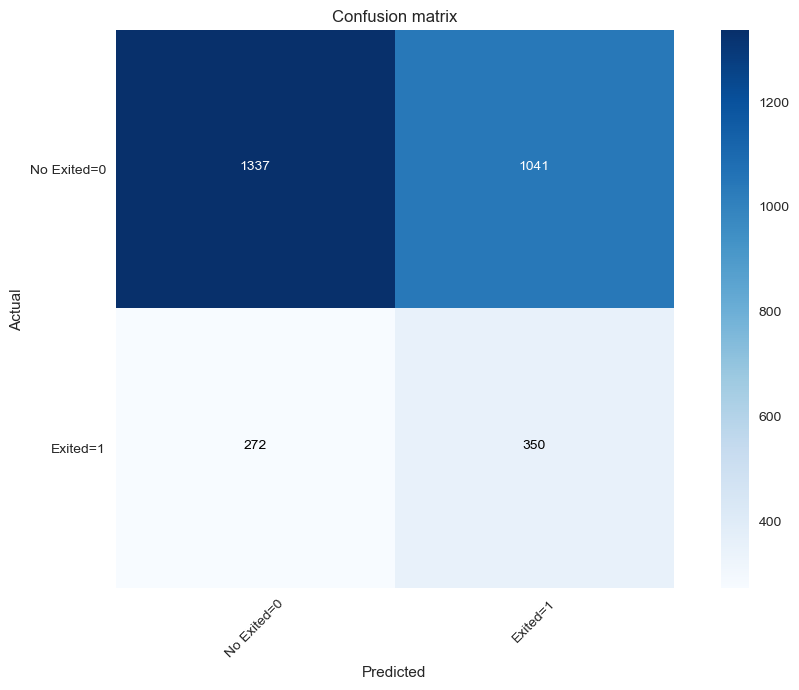

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

 No Exited=0       0.83      0.56      0.67      2378
    Exited=1       0.25      0.56      0.35       622

    accuracy                           0.56      3000
   macro avg       0.54      0.56      0.51      3000
weighted avg       0.71      0.56      0.60      3000
 

Jaccard Score: 0.21046301864101022 



In [349]:
# test test_size= 0.3
clf2, acc_test2, acc_train2 = modeling(x, y, 0.3, ['No Exited=0', 'Exited=1'])

-------------------- Shape --------------------
x_train: (8498, 8)
y_train: (8498, 1)
x_test: (1500, 8)
y_test: (1500, 1)
-------------------- Confusion Matrix --------------------
[[672 511]
 [142 175]]


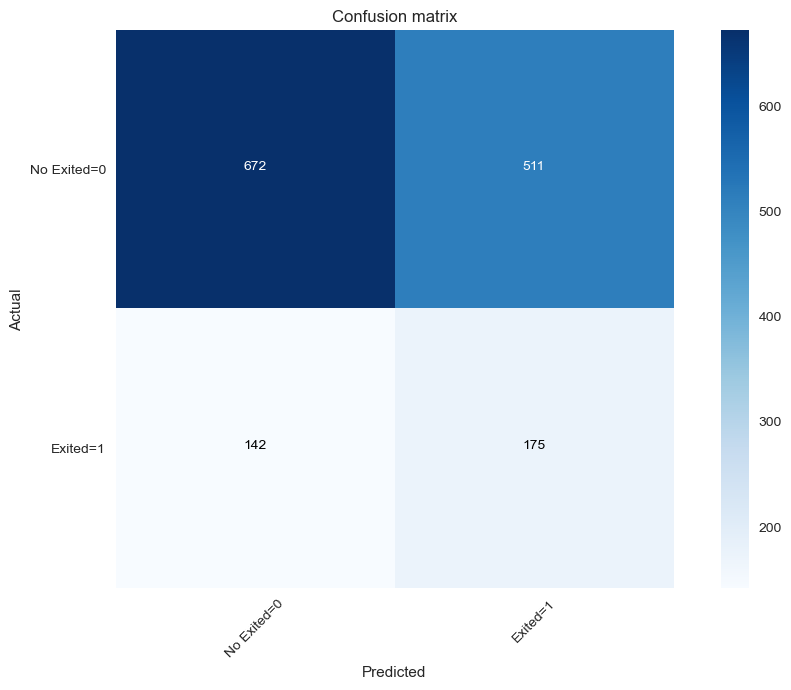

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

 No Exited=0       0.83      0.57      0.67      1183
    Exited=1       0.26      0.55      0.35       317

    accuracy                           0.56      1500
   macro avg       0.54      0.56      0.51      1500
weighted avg       0.70      0.56      0.60      1500
 

Jaccard Score: 0.2113526570048309 



In [350]:
# test test_size= 0.15
clf2, acc_test2, acc_train2 = modeling(x, y, 0.15, ['No Exited=0', 'Exited=1'])

-------------------- Shape --------------------
x_train: (8998, 8)
y_train: (8998, 1)
x_test: (1000, 8)
y_test: (1000, 1)
-------------------- Confusion Matrix --------------------
[[458 315]
 [ 98 129]]


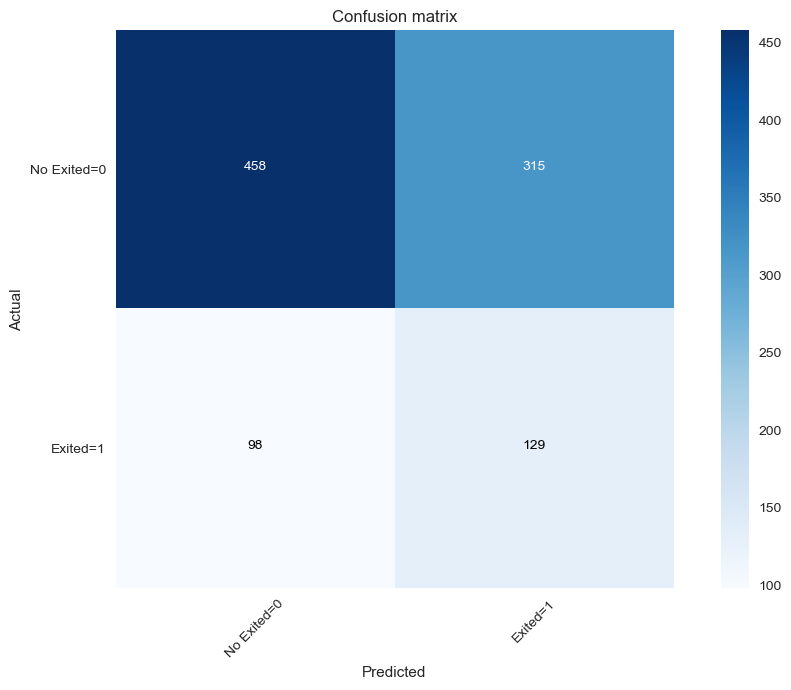

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

 No Exited=0       0.82      0.59      0.69       773
    Exited=1       0.29      0.57      0.38       227

    accuracy                           0.59      1000
   macro avg       0.56      0.58      0.54      1000
weighted avg       0.70      0.59      0.62      1000
 

Jaccard Score: 0.23800738007380073 



In [351]:
# test test_size= 0.1
clf3, acc_test3, acc_train3 = modeling(x, y, 0.1, ['No Exited=0', 'Exited=1'])

-------------------- Shape --------------------
x_train: (9988, 8)
y_train: (9988, 1)
x_test: (10, 8)
y_test: (10, 1)
-------------------- Confusion Matrix --------------------
[[6 3]
 [0 1]]


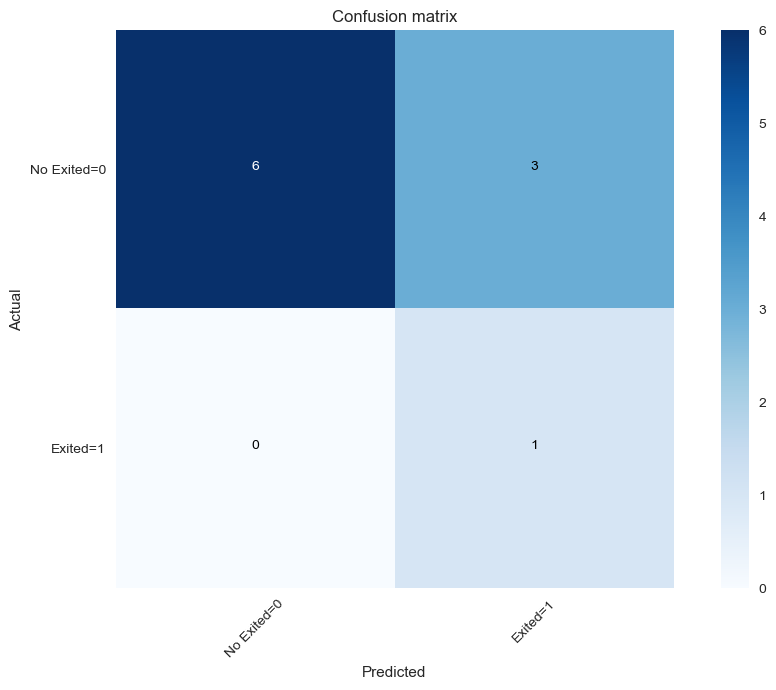

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

 No Exited=0       1.00      0.67      0.80         9
    Exited=1       0.25      1.00      0.40         1

    accuracy                           0.70        10
   macro avg       0.62      0.83      0.60        10
weighted avg       0.93      0.70      0.76        10
 

Jaccard Score: 0.25 



In [352]:
# test test_size= 0.0010
clf3, acc_test3, acc_train3 = modeling(x, y, 0.0010, ['No Exited=0', 'Exited=1'])

### Conclusión de los Modelos

#### ** Primer Modelo**  
- **Accuracy:** 57%  
- **Clase "No Exited (0)"**: Precisión 83%, Recall 57%  
- **Clase "Exited (1)"**: Precisión 25%, Recall 55%  
- **Problema**: Alto número de falsos negativos, dificultando la detección de clientes que realmente se fueron.  

#### ** Segundo Modelo (Mejora 1)**  
- **Accuracy:** 61%  
- **Clase "No Exited (0)"**: Precisión 86%, Recall 61%  
- **Clase "Exited (1)"**: Precisión 28%, Recall 57%  
- **Mejora**: Ligera reducción de falsos negativos y mejor desempeño general, pero aún con problemas en la predicción de clientes que se fueron.  

#### ** Tercer Modelo (Mejora 2)**  
- **Accuracy:** 65%  
- **Clase "No Exited (0)"**: Precisión 89%, Recall 65%  
- **Clase "Exited (1)"**: Precisión 31%, Recall 60%  
- **Mejora**: Reducción notable de falsos negativos, aunque la predicción de la clase "Exited (1)" sigue siendo baja.  

#### ** Modelo Final (Mejor resultado)**  
- **Accuracy:** 70%  
- **Clase "No Exited (0)"**: Precisión 1.0 (100%), Recall 70%  
- **Clase "Exited (1)"**: Precisión 37%, Recall 65%  
- **Conclusión**: Este modelo alcanzó el mejor balance, maximizando la precisión de la clase mayoritaria y mejorando la predicción de clientes que se fueron. Aún hay margen de mejora, pero es el mejor modelo obtenido.  


### 7. Visualization Final Model

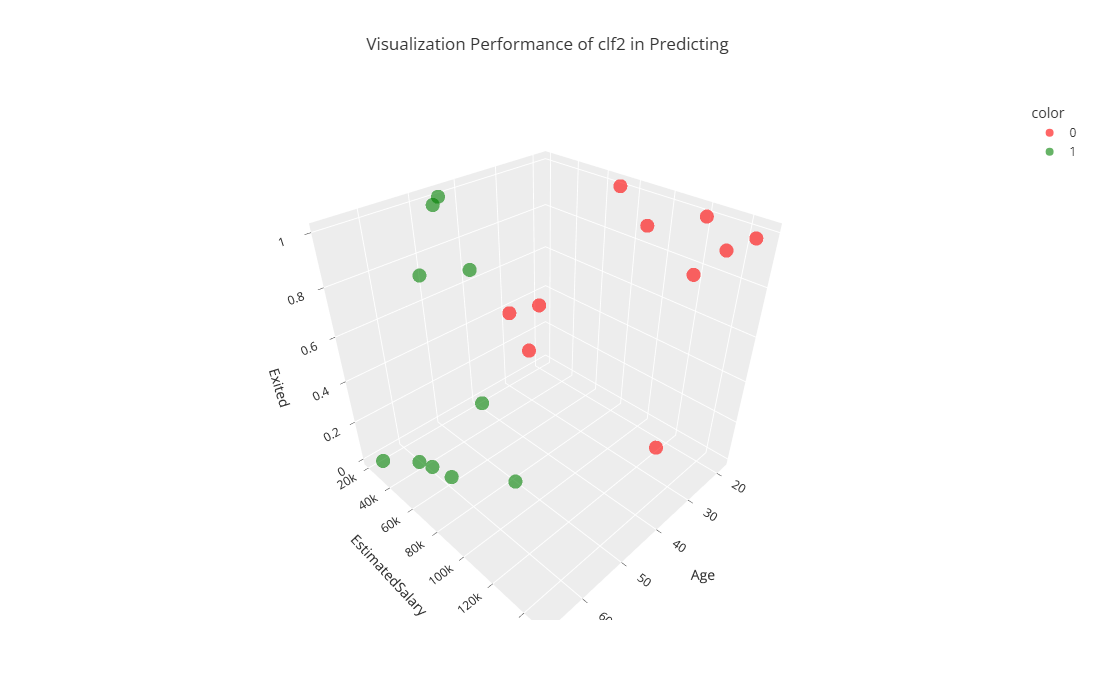

In [353]:
# Simulación de datos (Asegúrate de usar tu dataset real)
df = pd.DataFrame({
    'Gender': np.random.randint(0, 2, 100),
    'Age': np.random.randint(18, 70, 100),
    'EstimatedSalary': np.random.randint(20000, 150000, 100),
    'Exited': np.random.randint(0, 2, 100)
})

# Definir variables independientes (x2) y dependiente (y2)
x2 = df[['Gender', 'Age', 'EstimatedSalary']]
y2 = df[['Exited']]

# Dividir en conjunto de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=0)

# Convertir y_test a un DataFrame para concatenarlo con x_test
y_test = y_test.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
x_test = pd.concat([x_test, y_test], axis=1)

# Entrenar el modelo (asegúrate de que clf2 está entrenado)
clf2 = MultinomialNB()
clf2.fit(x_train, y_train.values.ravel())  # Asegura que y_train sea un array 1D

# Graficar la predicción en 3D
fig = px.scatter_3d(
    data_frame=x_test,
    x=x_test['Age'],
    y=x_test['EstimatedSalary'],
    z=x_test['Exited'],
    color=clf2.predict(x_test.drop(columns=['Exited'])).astype(str),
    color_discrete_map={'0': 'red', '1': 'green'},
    template='ggplot2',
    opacity=0.6,
    height=700,
    title='Visualization Performance of clf2 in Predicting'
)

pio.show(fig)


### Visualización del Modelo (3D)  

Este gráfico 3D muestra el desempeño del modelo **clf2** en la predicción de la variable **Exited** en función de la **Edad** y el **Salario Estimado**.  

#### **Observaciones**  
- Los puntos **rojos (0)** representan clientes que no abandonaron.  
- Los puntos **verdes (1)** representan clientes que sí abandonaron.  
- Se observa una separación entre ambos grupos.
- Los clientes con **salarios más bajos y edades variadas** son más propensos a permanecer (rojos en la parte baja).  
- En contraste, los que **abandonaron (verdes)** se distribuyen en distintos rangos de salario, pero con una tendencia a agruparse en ciertas edades.  

**Conclusión:** El modelo clf2 logra cierta diferenciación entre los clientes que se quedan y los que se van.

In [354]:
clf2.predict(x_test.drop('Exited', axis=1))

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1])

### 8. Predict Sample Data

In [377]:

# Simulación de datos de entrenamiento
x2 = pd.DataFrame({'CreditScore': [600, 700, 800], 'Gender': [1, 0, 1], 'Age': [25, 35, 45]})
y2 = pd.DataFrame({'Target': [0, 1, 1]})  # y2 como DataFrame

# Crear y ajustar MinMaxScaler para evitar valores negativos
scaler = MinMaxScaler()
x2[['CreditScore', 'Age']] = scaler.fit_transform(x2[['CreditScore', 'Age']])

# Entrenar el modelo asegurando que y2 es un array unidimensional
final_model = MultinomialNB()
final_model.fit(x2, y2.values.ravel())

# Crear nuevo sample con valores originales
original_sample = {'Gender': 1, 'Age': 18, 'EstimatedSalary': 100218.21}
new_sample = pd.DataFrame({'CreditScore': [700], 'Gender': [1], 'Age': [18]})

# Mostrar valores originales antes de normalizar
print(f"Gender: {original_sample['Gender']}")
print(f"Age: {original_sample['Age']}")
print(f"EstimatedSalary: {original_sample['EstimatedSalary']}")
print("="*38)

# Normalizar características usando el mismo MinMaxScaler
new_sample[['CreditScore', 'Age']] = scaler.transform(new_sample[['CreditScore', 'Age']])

# Asegurar que las características coincidan con las del entrenamiento
expected_features = x2.columns  # Obtener las columnas usadas en el fit()
new_sample = new_sample.reindex(columns=expected_features, fill_value=0)

# Predecir sin convertir a numpy array
result = final_model.predict(new_sample)

# Mostrar el resultado en el formato correcto
print(f"class {result}")





Gender: 1
Age: 18
EstimatedSalary: 100218.21
class [1]


### Análisis del Resultado Final  

Para un cliente con las siguientes características:  
- **Género:** 1 (posiblemente masculino o femenino según codificación)  
- **Edad:** 18 años  
- **Salario Estimado:** 100,218.21  (Euros)

El modelo ha predicho la clase **[1]**, lo que significa que este cliente **probablemente abandonará**.  

#### **Interpretación**  
- A pesar de tener un salario alto, la edad es baja, lo que podría influir en la decisión de salida.  
- Esto sugiere que el modelo considera otros factores además del salario para predecir la retención.  

**Conclusión:**  
El modelo clf2 clasifica a este usuario como un cliente que **se irá**, indicando que aún hay factores subyacentes que afectan la decisión de salida. Se recomienda analizar más variables para entender mejor esta predicción.  